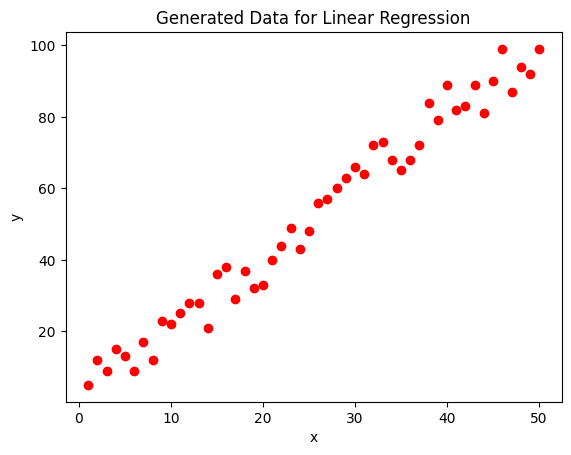


Name: 
Register No: 
Initial Weight: 0.10597813, Initial Bias: 0.96379614

epoch:  1  loss: 3057.21679688  weight: 3.33490014  bias: 1.06046367
epoch:  2  loss: 1588.53063965  weight: 1.01483285  bias: 0.99226284
epoch:  3  loss: 830.29992676  weight: 2.68179941  bias: 1.04252183
epoch:  4  loss: 438.85217285  weight: 1.48402131  bias: 1.00766504
epoch:  5  loss: 236.76144409  weight: 2.34460592  bias: 1.03396463
epoch:  6  loss: 132.42912292  weight: 1.72622538  bias: 1.01632178
epoch:  7  loss: 78.56572723  weight: 2.17050409  bias: 1.03025162
epoch:  8  loss: 50.75775909  weight: 1.85124576  bias: 1.02149546
epoch:  9  loss: 36.40123367  weight: 2.08060074  bias: 1.02903891
epoch: 10  loss: 28.98922920  weight: 1.91576838  bias: 1.02487016
epoch: 11  loss: 25.16238213  weight: 2.03416562  bias: 1.02911627
epoch: 12  loss: 23.18647385  weight: 1.94905841  bias: 1.02731562
epoch: 13  loss: 22.16612625  weight: 2.01017213  bias: 1.02985907
epoch: 14  loss: 21.63911057  weight: 1.96622

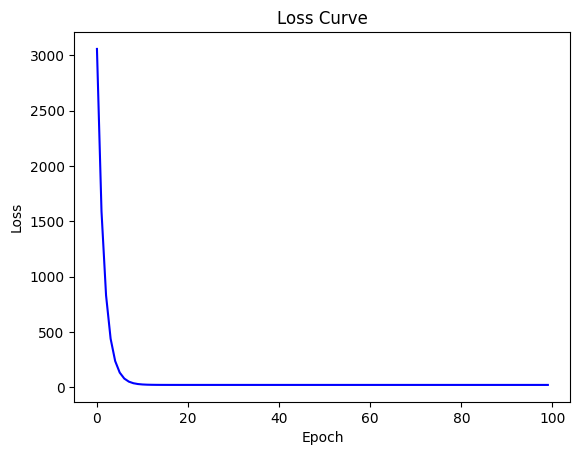


Name: 
Register No: 

Final Weight: 1.98277164, Final Bias: 1.09101629


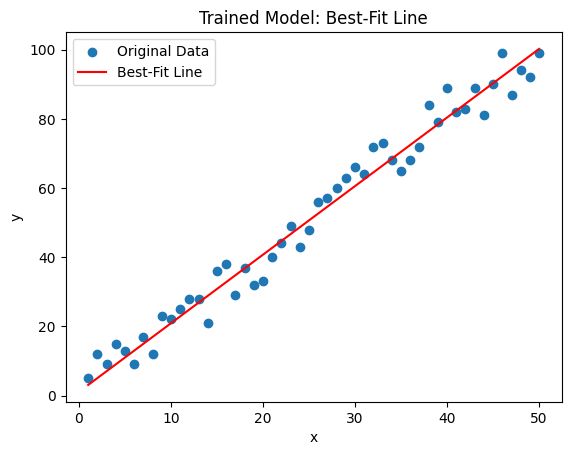


Name: 
Register No: 

Prediction for x = 120: 239.02362061


In [1]:
import torch
import torch.nn as nn  # Neural network module
import matplotlib.pyplot as plt  # For plotting

#  Generate Input Data (X) and Output Data (y)
torch.manual_seed(71)  # For reproducibility
X = torch.linspace(1, 50, 50).reshape(-1, 1)
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)
y = 2 * X + 1 + e  # True function: y = 2x + noise

# Plot the original data
plt.scatter(X, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

# Define the Linear Model Class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
       # self.linear= nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

# Initialize the Model
torch.manual_seed(59)  # Ensure same initial weights
model = Model(1, 1)

# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print("\nName: ")
print("Register No: ")
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')

# Define Loss Function & Optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the Model
epochs = 100
losses = []

for epoch in range(1, epochs + 1):  # Loop over epochs
    optimizer.zero_grad()  # Reset gradients to zero before computing new ones
    y_pred = model(X)  # Forward pass: Compute predicted y values
    loss = loss_function(y_pred, y)  # Compute loss between predicted and actual y
    losses.append(loss.item())  # Store loss value for tracking

    loss.backward()  # Compute gradients (backpropagation)
    optimizer.step()  # Update weights and bias using gradients

    # Print loss, weight, and bias for EVERY epoch
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

# Plot Loss Curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print("\nName: ")
print("Register No: ")
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')

#  Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute corresponding y-values using trained model

# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

# Prediction for x = 120
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model
print("\nName: ")
print("Register No: ")
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")
